# **Exploratory Data Analysis**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

## **1) Core Objectives**
---

### Overview:

Our primary objective with this exploratory analysis is to identify the features in our data that best represent our understanding of the [root causes of flight delays](../Research/flight_delay_reasons.md) and in so doing, provide the basis for the **accurate** and **reliable** prediction of commercial flight delays. We aim to develop a sense for how well our feature space captures common flight delay reasons in order to determine which features to select, which additional data to gather, and which features should be re-engineered or excluded.

### [Suggested Considerations](https://github.com/lighthouse-labs/mid-term-project-I/blob/master/exploratory_analysis.ipynb):

- Test the hypothesis that the delay is from Normal distribution and that mean of the delay is 0. Be careful about the outliers.
- Is average/median monthly delay different during the year? If so, which months have the biggest delays and what could be the reason?
- Does the weather affect the delay?
- How are taxi times changing during the day? Does higher traffic lead to longer taxi times?
- What is the average percentage of delays that exist prior to departure (*i.e.* are arrival delays caused by departure delays)? Are airlines able to lower the delay during the flights?
- How many states cover 50% of US air traffic?
- Test the hypothesis that planes fly faster when there is a departure delay.
- When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?
- Find the top 10 the bussiest airports. Does the greatest number of flights mean that the majority of passengers went through a given airport? How much traffic do these 10 airports cover?
- Do bigger delays lead to bigger fuel consumption per passenger?

## **2) Data Cleaning**
---

### **flights** ([sample](../Scripts/sampling.sql)) & **flights_test**

#### Overview:

##### **flights** sample

In [2]:
flights = pd.read_csv('../Data/files/flights_sample.csv')
flights.head()

C:\Users\jonas.MSI\anaconda3\envs\sandbox\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-05-19,UA,UA_CODESHARE,UA,4264,EV,N48901,4264,12266,IAH,...,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05-19,UA,UA_CODESHARE,UA,4266,EV,N12540,4266,13244,MEM,...,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-19,UA,UA_CODESHARE,UA,4272,EV,N11164,4272,12266,IAH,...,1091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-05-19,UA,UA_CODESHARE,UA,4281,EV,N13995,4281,11042,CLE,...,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-19,UA,UA_CODESHARE,UA,4286,EV,N13903,4286,13061,LRD,...,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387955 entries, 0 to 2387954
Data columns (total 42 columns):
 #   Column               Dtype  
---  ------               -----  
 0   fl_date              object 
 1   mkt_unique_carrier   object 
 2   branded_code_share   object 
 3   mkt_carrier          object 
 4   mkt_carrier_fl_num   int64  
 5   op_unique_carrier    object 
 6   tail_num             object 
 7   op_carrier_fl_num    int64  
 8   origin_airport_id    int64  
 9   origin               object 
 10  origin_city_name     object 
 11  dest_airport_id      int64  
 12  dest                 object 
 13  dest_city_name       object 
 14  crs_dep_time         int64  
 15  dep_time             float64
 16  dep_delay            float64
 17  taxi_out             float64
 18  wheels_off           float64
 19  wheels_on            float64
 20  taxi_in              float64
 21  crs_arr_time         int64  
 22  arr_time             float64
 23  arr_delay            float64
 24

##### **flights_test**

In [4]:
flights_test = pd.read_csv('../Data/files/flights_test.csv')
flights_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01 00:00:00,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01 00:00:00,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01 00:00:00,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01 00:00:00,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01 00:00:00,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333


In [5]:
flights_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660556 entries, 0 to 660555
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   fl_date             660556 non-null  object
 1   mkt_unique_carrier  660556 non-null  object
 2   branded_code_share  660556 non-null  object
 3   mkt_carrier         660556 non-null  object
 4   mkt_carrier_fl_num  660556 non-null  int64 
 5   op_unique_carrier   660556 non-null  object
 6   tail_num            659057 non-null  object
 7   op_carrier_fl_num   660556 non-null  int64 
 8   origin_airport_id   660556 non-null  int64 
 9   origin              660556 non-null  object
 10  origin_city_name    660556 non-null  object
 11  dest_airport_id     660556 non-null  int64 
 12  dest                660556 non-null  object
 13  dest_city_name      660556 non-null  object
 14  crs_dep_time        660556 non-null  int64 
 15  crs_arr_time        660556 non-null  int64 
 16  du

#### **flights** sample vs. **flights_test** feature space

To establish the similarities and difference between the feature spaces of **flights** and **flights_test** rather quickly, we can leverage sets to find the intersection and symmetric difference of their features.

In [6]:
flights_initial_features = set(flights.columns)
flights_test_initial_features = set(flights_test.columns)

common_initial_features = flights_initial_features.intersection(flights_test_initial_features)
exclusive_initial_features = flights_initial_features.symmetric_difference(flights_test_initial_features)

Let us check if the flights_test feature space is entirely a subset of flights.

In [7]:
print(
    len(common_initial_features) == len(flights_test_initial_features), 
    len(flights_test_initial_features),
    sep="\n",
    )

True
20


This confirms that the feature space of flights_test is a subset of flights (which is expected given its [description](../Data/descriptions/flights_test_description.md)). Now let us check which additional features we have in the **flights** table.

In [8]:
print('Features exclusive to flights:\n')
for feature in exclusive_initial_features:
    print(feature)

print(f'\nNumber of features exclusive to flights: {len(exclusive_initial_features)}')

Features exclusive to flights:

diverted
carrier_delay
total_add_gtime
dep_delay
nas_delay
cancelled
longest_add_gtime
first_dep_time
wheels_on
no_name
cancellation_code
wheels_off
arr_delay
dep_time
taxi_in
arr_time
actual_elapsed_time
weather_delay
taxi_out
security_delay
late_aircraft_delay
air_time

Number of features exclusive to flights: 22


All of these features exclusive to **flights** are those that we can only know once the plane has already arrived (excluding `no_name`). Therefore, any useful features as part of this set would need to be predicted in order to make an inference about future flight delays.

#### Missing data investigation:

Preview missing data percentages for features with null values.

In [9]:
flights_missing_values = flights.isna().sum() > 0
flights_missing_value_percentage = flights.isna().sum() / flights.shape[0] * 100

flights_missing_value_percentage[flights_missing_values]

tail_num                 0.304947
dep_time                 1.616865
dep_delay                1.647979
taxi_out                 1.707151
wheels_off               1.707151
wheels_on                1.754681
taxi_in                  1.754681
arr_time                 1.718165
arr_delay                1.944132
cancellation_code       98.317305
crs_elapsed_time         0.000168
actual_elapsed_time      1.927172
air_time                 1.963605
carrier_delay           81.124770
weather_delay           81.124770
nas_delay               81.124770
security_delay          81.124770
late_aircraft_delay     81.124770
first_dep_time          99.313597
total_add_gtime         99.313722
longest_add_gtime       99.313681
no_name                100.000000
dtype: float64

In [10]:
flights_test_missing_values = flights_test.isna().sum() > 0
flights_test_missing_value_percentage = flights_test.isna().sum() / flights.shape[0] * 100

flights_test_missing_value_percentage[flights_test_missing_values]

tail_num    0.062773
dtype: float64

##### Empty rows

We will start by ensuring that empty rows are discarded as they offer no information.

In [11]:
flights = flights.dropna(how='all')
flights_test = flights_test.dropna(how='all')

##### `no_name`

no_name is completely blank, so we can drop it with absolutely no information loss.

In [12]:
flights = flights.drop('no_name', axis=1)

##### `cancellation_code`

In [13]:
flights.cancellation_code.unique()

array([nan, 'A', 'C', 'B', 'D'], dtype=object)

It may be worthwhile to investigate the `cancellation_code` feature further, but the missing proportion here should correspond with the `cancelled` feature assuming that codes are only present for cancelled flights (as suggested in the flights description). In other words, most data in this column is ***structually missing*** (i.e. missing because most flights were not cancelled).

In [14]:
flights['cancelled'].value_counts()/flights.shape[0] * 100

0    98.317305
1     1.682695
Name: cancelled, dtype: float64

The percentages support the structurally missing data hypothesis, but let us confirm by inspecting the relevant subset more rigorously.

In [15]:
flights[flights.cancelled > 0]['cancellation_code'].unique()

array(['A', 'C', 'B', 'D'], dtype=object)

In [16]:
flights[flights.cancelled == 0]['cancellation_code'].unique()

array([nan], dtype=object)

We have the most support that we can obtain from the data for the structurally missing hypothesis with respect to `cancellation_code`! It remains possible that human errors (e.g. data entry) are present but obscured in this table.

In [17]:
type(flights['cancellation_code'].unique()[0]) # nan is of type float in this case.

float

In [18]:
# Replace the missing value for now so that we do not consider the column further.
flights['cancellation_code'] = flights['cancellation_code'].apply(lambda code: 'none' if (isinstance(code, float)) else code)
flights['cancellation_code'].unique()

array(['none', 'A', 'C', 'B', 'D'], dtype=object)

##### '`_delay`' columns

All of the delay columns have identical percentages of missing data in **flights** (none are present in **flights_test**). Here we will test the hypothesis that the missing rows for all of these columns are the same. Resultantly, we predict that missing data will be consistent between rows for these features. This may suggest that these data are also ***structurally missing***.  

This may mean that any time a flight is delayed, all delay columns are assigned a baseline value of 0 (as opposed to NaN) and this baseline is incremented appropriately according to the class of delay.

In [19]:
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
delays_subframe = flights[delay_columns]
delays_subframe.head()
# These 5 rows concurrently displaying NaN provide very weak support for the above hypothesis. Let us investigate more closely.

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


Let us check the rows that remain for each delay feature when those with missing values are discarded and ensure that it matches the value predicted given that our hypothesis is correct. Since we know that all delay columns have the same missing value percentage, we can use one as a reference value.

In [20]:
# Determine the actual percentages of non-missing data for the delay rows and the values we expect to see given our hypothesis.
delay_value_percentages = [(delays_subframe[column].dropna().count() / flights.shape[0] * 100)
                           for column in delays_subframe]
predicted_value = (100 - flights_missing_value_percentage.late_aircraft_delay)

np.allclose(delay_value_percentages, predicted_value) # used to prevent rounding errors from causing problems with strict equality

True

It does appear that the missing values correspond with no delay, and are thus structurally missing. It should be noted that the proportion of delayed flights in this sample lines up fairly well with what is observed overall in the publicly available data from the [US Department of Transportation](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E). On this basis, we can impute these missing values as 0.

In [21]:
flights[delay_columns] = delays_subframe.fillna(0)

In [22]:
flights_missing_values = flights.isna().sum() > 0
flights_missing_value_percentage = flights.isna().sum() / flights.shape[0] * 100

flights_missing_value_percentage[flights_missing_values]

tail_num                0.304947
dep_time                1.616865
dep_delay               1.647979
taxi_out                1.707151
wheels_off              1.707151
wheels_on               1.754681
taxi_in                 1.754681
arr_time                1.718165
arr_delay               1.944132
crs_elapsed_time        0.000168
actual_elapsed_time     1.927172
air_time                1.963605
first_dep_time         99.313597
total_add_gtime        99.313722
longest_add_gtime      99.313681
dtype: float64

##### `dep_time` and `_gtime` columns

These columns are interesting because not only is the majority of data missing in similar percentages in all 3 of these columns, but the values are not precisely the same. Here we will investigate points of similarity and divergence between observations.

In [23]:
departure_and_gate_time_columns = ['first_dep_time', 'total_add_gtime', 'longest_add_gtime']
departure_and_gate_times = flights[departure_and_gate_time_columns]

In [24]:
some_missing = departure_and_gate_times.dropna(how='all')
no_missing = departure_and_gate_times.dropna()

missing_rows = set(some_missing.index).symmetric_difference(set(no_missing.index))
flights.loc[missing_rows].T # display the transpose for the 3 indices.

,813489,2020945,2027091
fl_date,2019-06-20,2018-02-26,2018-02-28
mkt_unique_carrier,B6,AS,DL
branded_code_share,B6,AS_CODESHARE,DL_CODESHARE
mkt_carrier,B6,AS,DL
mkt_carrier_fl_num,631,3296,5909
op_unique_carrier,B6,KS,YX
tail_num,N339JB,N682PA,N860RW
op_carrier_fl_num,631,3296,5909
origin_airport_id,10721,10299,12953
origin,BOS,ANC,LGA


In [25]:
flights.loc[missing_rows]['arr_delay']

813489     145.0
2020945    137.0
2027091    201.0
Name: arr_delay, dtype: float64

There are only 3 rows here with mixed missing values, and all have a departure time. Since none of these flights were cancelled, it is sensible to conclude that either none of them returned to the gate or these may be data entry errors (this is likely for index 2020945, which apparently never left the gate according to the 0 for `longest_add_gtime`).

Overall, because it is not clear what these features are adding and they are missing entirely for the overwhelming majority of the data, we will simply discard them.

In [26]:
flights = flights.drop(columns=departure_and_gate_time_columns)

##### Remainder of missing values:

Given the surplus of observations we have for the **flights** table, and the low missing data percentages for all other observations (<2%), it is worth checking how much data would be lost if all rows missing data were discarded.

In [27]:
total_observations_retained = flights.dropna().shape[0]
percent_data_retained = total_observations_retained / flights.shape[0] * 100

print(f'Total observations retained / {flights.shape[0]}: {total_observations_retained}')
print(f'Percentage retained: {percent_data_retained:.2f}')

Total observations retained / 2387955: 2339962
Percentage retained: 97.99


Given the minimal percentage loss in tandem with the massive sample size retained by dropping rows with missing values, the tradeoff it worth it in this instance.

In [28]:
flights = flights.dropna()

By the above logic, the tradeoff should be similarly valuable for **flights_test**:

In [29]:
total_observations_retained = flights_test.dropna().shape[0]
percent_data_retained = total_observations_retained / flights_test.shape[0] * 100

print(f'Total observations retained / {flights_test.shape[0]}: {total_observations_retained}')
print(f'Percentage retained: {percent_data_retained:.2f}')

Total observations retained / 660556: 659057
Percentage retained: 99.77


In [30]:
flights_test = flights_test.dropna()

#### **passengers**

In [31]:
passengers = pd.read_csv('../Data/files/passengers.csv')
passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,month,year,distance_group,class,data_source
0,2,2,75800,300,244,0,0,1020,310,259,...,US,United States,6,694,1,2017,3,3,F,DU
1,2,2,72400,256,219,458,950,255,140,90,...,US,United States,6,698,1,2017,3,1,F,DU
2,2,2,76000,300,240,75,335,601,208,174,...,US,United States,6,694,1,2017,3,2,F,DU
3,2,2,104600,376,187,0,58,304,156,103,...,US,United States,6,622,1,2017,3,1,F,DU
4,2,2,72700,256,214,3,553,507,196,156,...,US,United States,6,698,1,2017,3,2,F,DU


List all the columns from the **passengers** dataframe.

In [32]:
passengers.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'month', 'year', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [33]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350497 entries, 0 to 2350496
Data columns (total 38 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   departures_scheduled   int64 
 1   departures_performed   int64 
 2   payload                int64 
 3   seats                  int64 
 4   passengers             int64 
 5   freight                int64 
 6   mail                   int64 
 7   distance               int64 
 8   ramp_to_ramp           int64 
 9   air_time               int64 
 10  unique_carrier         object
 11  airline_id             int64 
 12  unique_carrier_name    object
 13  region                 object
 14  carrier                object
 15  carrier_name           object
 16  carrier_group          int64 
 17  carrier_group_new      int64 
 18  origin_airport_id      int64 
 19  origin_city_market_id  int64 
 20  origin                 object
 21  origin_city_name       object
 22  origin_country         object
 23  origin_

#### **passengers** feature space

Preview missing data percentages for features with null values.

In [34]:
passengers_missing_values = passengers.isna().sum() > 0
passengers_missing_value_percentage = passengers.isna().sum() / passengers.shape[0] * 100

passengers_missing_value_percentage[passengers_missing_values]

origin_country    0.000128
dtype: float64

On the passengers table, only the `origin_country` feature had missing values and this column is of the str datatype. It is a column of str data type.

In [35]:
passengers.origin_country.unique()

array(['US', 'CA', 'GB', 'JP', 'EC', 'DO', 'MX', 'CO', 'BS', 'TC', 'CR',
       'AG', 'BB', 'CW', 'JM', 'VE', 'NI', 'SR', 'TT', 'PA', 'KN', 'LC',
       'BQ', 'BZ', 'KY', 'HN', 'FR', 'SN', 'CN', 'FM', 'GT', 'SV', 'NL',
       'IE', 'MQ', 'GD', 'HT', 'IL', 'BR', 'KR', 'AW', 'ES', 'DE', 'BM',
       'SX', 'TW', 'BL', 'VC', 'IT', 'CU', 'CZ', 'DM', 'GP', 'AR', 'BE',
       'PT', 'AU', 'GY', 'CH', 'SG', 'HK', 'PE', 'SE', 'DK', 'RU', 'GH',
       'PF', 'CL', 'PW', 'VG', 'GR', 'IS', 'PH', 'NZ', 'UY', 'MH', 'AI',
       'NG', 'ZA', 'IN', 'BO', 'HU', 'WS', 'NO', 'AZ', 'FI', 'SA', 'AE',
       'KI', 'FJ', 'LV', 'PL', 'CK', 'AT', 'PK', 'UA', 'QA', 'JO', 'CV',
       'AO', 'LU', 'RO', 'KW', nan, 'GL', 'DZ', 'SL', 'MT', 'RS', 'LR',
       'MA', 'GF', 'KH', 'HR', 'EG', 'MO', 'ET', 'LK', 'TR', 'GM', 'PY',
       'SI', 'KZ', 'MY', 'PG', 'BD', 'VN', 'TH', 'CF', 'BG', 'BH', 'ID',
       'ME', 'EE', 'GE', 'GI', 'CY', 'LT', 'BF', 'TO', 'SK', 'KE', 'UZ',
       'GA', 'NC', 'MD', 'VU', 'ML', 'AM', 'MK', 'BJ

In [36]:
print(f'There are only {passengers.origin_country.isna().sum()} rows with null/missing values on this table.')

There are only 3 rows with null/missing values on this table.


In [37]:
passengers[passengers.origin_country.isna()].origin_country

463912     NaN
585528     NaN
1020880    NaN
Name: origin_country, dtype: object

The rows with missing values for the `origin_country` feature could be safely dropped because they only accounted for 0.000128 % of the data.

In [38]:
passengers_total_observations_retained = passengers.dropna().shape[0]
passengers_percent_data_retained = passengers_total_observations_retained / passengers.shape[0] * 100

print(f'Total observations retained / {passengers.shape[0]}: {passengers_total_observations_retained}')
print(f'Percentage retained: {passengers_percent_data_retained:.2f}')

Total observations retained / 2350497: 2350494
Percentage retained: 100.00


In [39]:
passengers = passengers.dropna()

In [40]:
passengers_missing_values = passengers.isna().sum() > 0
passengers_missing_value_percentage = passengers.isna().sum() / passengers.shape[0] * 100

passengers_missing_value_percentage[passengers_missing_values]

Series([], dtype: float64)

Drop empty rows from **passengers**.

In [41]:
passengers = passengers.dropna(how='all')

There are no empty rows in **passengers**.

In [42]:
passengers['class'].unique()

array(['F', 'G', 'P', 'L'], dtype=object)

In [43]:
passengers['data_source'].unique()

array(['DU', 'IU', 'IF', 'DF'], dtype=object)

##### 

#### **fuel_consumption**

In [97]:
fuel = pd.read_csv('../Data/files/fuel_consumption.csv')
fuel.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016


In [98]:
fuel.isna().sum() > 0

month                False
airline_id            True
unique_carrier        True
carrier              False
carrier_name          True
carrier_group_new    False
sdomt_gallons         True
satl_gallons          True
spac_gallons          True
slat_gallons          True
sint_gallons          True
ts_gallons            True
tdomt_gallons         True
tint_gallons          True
total_gallons         True
sdomt_cost           False
satl_cost             True
spac_cost             True
slat_cost             True
sint_cost             True
ts_cost              False
tdomt_cost           False
tint_cost             True
total_cost           False
year                 False
dtype: bool

In [46]:
# Examine rows with missing values

#fuel_consumption[fuel_consumption['sdomt_gallons'].isna()]
#fuel_consumption[fuel_consumption['satl_gallons'].isna()]
#fuel_consumption[fuel_consumption['spac_gallons'].isna()]
#fuel_consumption[fuel_consumption['slat_gallons'].isna()]
#fuel_consumption[fuel_consumption['sint_gallons'].isna()]
#fuel_consumption[fuel_consumption['ts_gallons'].isna()]
#fuel_consumption[fuel_consumption['tdomt_gallons'].isna()]
#fuel_consumption[fuel_consumption['total_gallons'].isna()]


In [99]:
fuel.columns

Index(['month', 'airline_id', 'unique_carrier', 'carrier', 'carrier_name',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost', 'year'],
      dtype='object')

In [100]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              3035 non-null   int64  
 1   airline_id         3034 non-null   float64
 2   unique_carrier     3034 non-null   object 
 3   carrier            3035 non-null   object 
 4   carrier_name       3034 non-null   object 
 5   carrier_group_new  3035 non-null   int64  
 6   sdomt_gallons      3034 non-null   float64
 7   satl_gallons       3034 non-null   float64
 8   spac_gallons       3034 non-null   float64
 9   slat_gallons       3033 non-null   float64
 10  sint_gallons       3034 non-null   float64
 11  ts_gallons         3034 non-null   float64
 12  tdomt_gallons      3032 non-null   float64
 13  tint_gallons       3034 non-null   float64
 14  total_gallons      3029 non-null   float64
 15  sdomt_cost         3035 non-null   int64  
 16  satl_cost          3034 

#### **fuel_consumption** feature space

#### **Missing data investigation**

Preview missing data percentages for features with null values.

In [101]:
fuel_missing_values = fuel.isna().sum() > 0
fuel_missing_value_percentage = fuel.isna().sum() / fuel.shape[0] * 100

fuel_missing_value_percentage[fuel_missing_values]

airline_id        0.032949
unique_carrier    0.032949
carrier_name      0.032949
sdomt_gallons     0.032949
satl_gallons      0.032949
spac_gallons      0.032949
slat_gallons      0.065898
sint_gallons      0.032949
ts_gallons        0.032949
tdomt_gallons     0.098847
tint_gallons      0.032949
total_gallons     0.197694
satl_cost         0.032949
spac_cost         0.032949
slat_cost         0.032949
sint_cost         0.032949
tint_cost         0.032949
dtype: float64

In [102]:
fuel_total_observations_retained = fuel.dropna().shape[0]
fuel_percent_data_retained = fuel_total_observations_retained / fuel.shape[0] * 100

print(f'Total observations retained / {fuel.shape[0]}: {fuel_total_observations_retained}')
print(f'Percentage retained: {fuel_percent_data_retained:.2f}')

Total observations retained / 3035: 3025
Percentage retained: 99.67


The rows with missing values for these features could be safely dropped because of their relatively low composition on the dataset.

In [103]:
fuel = fuel.dropna()

In [104]:
fuel_missing_values = fuel.isna().sum() > 0
fuel_missing_value_percentage = fuel.isna().sum() / fuel.shape[0] * 100

fuel_missing_value_percentage[fuel_missing_values]

Series([], dtype: float64)

In [105]:
fuel = fuel.dropna(how='all')

In [106]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3025 entries, 1 to 3034
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              3025 non-null   int64  
 1   airline_id         3025 non-null   float64
 2   unique_carrier     3025 non-null   object 
 3   carrier            3025 non-null   object 
 4   carrier_name       3025 non-null   object 
 5   carrier_group_new  3025 non-null   int64  
 6   sdomt_gallons      3025 non-null   float64
 7   satl_gallons       3025 non-null   float64
 8   spac_gallons       3025 non-null   float64
 9   slat_gallons       3025 non-null   float64
 10  sint_gallons       3025 non-null   float64
 11  ts_gallons         3025 non-null   float64
 12  tdomt_gallons      3025 non-null   float64
 13  tint_gallons       3025 non-null   float64
 14  total_gallons      3025 non-null   float64
 15  sdomt_cost         3025 non-null   int64  
 16  satl_cost          3025 

There are no empty rows in **fuel_consumption**.

### Storing the processed files

In [107]:
flights.to_csv('../Data/files/flights_no_missing.csv', index=False)
flights_test.to_csv('../Data/files/flights_test_no_missing.csv', index=False)
fuel.to_csv('../Data/files/fuel_no_missing.csv', index=False)
passengers.to_csv('../Data/files/passengers_no_missing.csv', index=False)

In [55]:
fuel_consumption[fuel_consumption['sdomt_gallons'].isna()]

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year


In [56]:
fuel_consumption.iloc[0:20]

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016
5,1,19917.0,5X,5X,United Parcel Service,3,32138000.0,9743000.0,16116000.0,2972000.0,...,34098000,9752000.0,17965000.0,3524000.0,31241000.0,65339000,34098000,31241000.0,65339000,2016
6,1,20007.0,5Y,5Y,Atlas Air Inc.,3,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,8575368,35795479.0,44370847,2016
7,1,19874.0,8C,8C,Air Transport International,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,42347,1855154.0,1897501,2016
8,1,20363.0,9E,9E,Endeavor Air Inc.,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
9,1,20190.0,9S,9S,Southern Air Inc.,2,821638.0,4696010.0,580875.0,0.0,...,1725440,9861621.0,1219839.0,0.0,11081460.0,12806900,1725440,11081460.0,12806900,2016
10,1,19805.0,AA,AA,American Airlines Inc.,3,174110023.0,34804210.0,18848029.0,54176666.0,...,195098544,34536551.0,18632951.0,68174028.0,121343530.0,316442074,195806362,121537723.0,317344085,2016


In [57]:
fuel_consumption.columns

Index(['month', 'airline_id', 'unique_carrier', 'carrier', 'carrier_name',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost', 'year'],
      dtype='object')

In [58]:
fuel_consumption['unique_carrier'].isna().sum()

0

In [59]:
for carrier in fuel_consumption['unique_carrier'].unique():
    print(carrier)

0WQ
23Q
27Q
5V
5X
5Y
8C
9E
9S
AA
ABX
AS
B6
CP
DL
EE
EV
F9
FX
G4
G7
GFQ
GL
HA
WL
KAQ
KD
KH
KLQ
L2
M6
MQ
N8
NC
NK
OH
OO
PFQ
PO
PRQ
QX
S5
SY
U7
UA
VX
WE
WI
WP
X9
XP
YV
YX
ZW
WN
09Q
1BQ
0JQ
FCQ
US
2HQ
3EQ


In [60]:
#common_initial_features = flights_initial_features.intersection(flights_test_initial_features)
#exclusive_initial_features = flights_initial_features.symmetric_difference(flights_test_initial_features)

In [61]:
set(fuel_consumption.unique_carrier).intersection(set(fuel_consumption.carrier))

{'09Q',
 '0JQ',
 '0WQ',
 '1BQ',
 '23Q',
 '27Q',
 '2HQ',
 '3EQ',
 '5V',
 '5X',
 '5Y',
 '8C',
 '9E',
 '9S',
 'AA',
 'ABX',
 'AS',
 'B6',
 'CP',
 'DL',
 'EE',
 'EV',
 'F9',
 'FCQ',
 'FX',
 'G4',
 'G7',
 'GFQ',
 'GL',
 'HA',
 'KAQ',
 'KD',
 'KH',
 'KLQ',
 'L2',
 'M6',
 'MQ',
 'N8',
 'NC',
 'NK',
 'OH',
 'OO',
 'PFQ',
 'PO',
 'PRQ',
 'QX',
 'S5',
 'SY',
 'U7',
 'UA',
 'US',
 'VX',
 'WE',
 'WI',
 'WL',
 'WN',
 'WP',
 'X9',
 'XP',
 'YV',
 'YX',
 'ZW'}

In [62]:
set(fuel_consumption.unique_carrier).symmetric_difference(set(fuel_consumption.carrier))

{'16', 'K8', 'MRQ'}

In [63]:
print(
    len(set(fuel_consumption.unique_carrier)) == len(set(fuel_consumption.carrier)), 
    len(set(fuel_consumption.unique_carrier)),
    len(set(fuel_consumption.carrier)),
    sep="\n",
    )

False
62
65


In [64]:
set(fuel_consumption.unique_carrier).symmetric_difference(set(passengers.unique_carrier))

{'02Q',
 '04Q',
 '07Q',
 '0BQ',
 '0CQ',
 '0GQ',
 '0J',
 '0Q',
 '0QQ',
 '0RQ',
 '0UQ',
 '10Q',
 '12Q',
 '13Q',
 '14Q',
 '15Q',
 '17Q',
 '1AQ',
 '1DQ',
 '1EQ',
 '1HQ',
 '1LQ',
 '1PQ',
 '1QQ',
 '1SQ',
 '1TQ',
 '1UQ',
 '1WQ',
 '1XQ',
 '1YQ',
 '1ZQ',
 '20Q',
 '22Q',
 '24Q',
 '25Q',
 '26Q',
 '28Q',
 '29Q',
 '2AQ',
 '2E',
 '2EQ',
 '2F',
 '2GQ',
 '2JQ',
 '2KQ',
 '2LQ',
 '2O',
 '2OQ',
 '2P',
 '2RQ',
 '2TQ',
 '2UQ',
 '30Q',
 '34Q',
 '36Q',
 '37Q',
 '38Q',
 '3AQ',
 '3BQ',
 '3DQ',
 '3E',
 '3F',
 '3M',
 '3S',
 '3SD',
 '3U',
 '4B',
 '4C',
 '4M',
 '4O',
 '4W',
 '4Y',
 '5C',
 '5D',
 '5J',
 '6R',
 '7C',
 '7H',
 '7I',
 '7L',
 '7S',
 '8D',
 '8E',
 '8I',
 '8R',
 '8V',
 '9K',
 '9V',
 '9W',
 '9X',
 'A0',
 'AAB',
 'AAT',
 'AB',
 'AC',
 'AD',
 'ADB',
 'AF',
 'AI',
 'AJQ',
 'AM',
 'AMQ',
 'AN',
 'AR',
 'AT',
 'AV',
 'AX',
 'AY',
 'AZ',
 'B0',
 'BA',
 'BC',
 'BCQ',
 'BF',
 'BR',
 'BW',
 'BX',
 'BY',
 'C5',
 'C8',
 'CA',
 'CAQ',
 'CAZ',
 'CC',
 'CH',
 'CI',
 'CK',
 'CM',
 'CRV',
 'CV',
 'CX',
 'CZ',
 'D7',
 'D8'

In [65]:
print(
    len(set(fuel_consumption.unique_carrier)) == len(set(passengers.unique_carrier)), 
    len(set(fuel_consumption.unique_carrier)),
    len(set(passengers.unique_carrier)),
    sep="\n",
    )

False
62
377


In [66]:
set(flights.mkt_unique_carrier)

{'AA', 'AS', 'B6', 'DL', 'F9', 'G4', 'HA', 'NK', 'UA', 'VX', 'WN'}

In [67]:
fuel_consumption[fuel_consumption.carrier == '16'].head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
1318,1,20397.0,OH,16,PSA Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2015
1374,2,20397.0,OH,16,PSA Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2015
1430,3,20397.0,OH,16,PSA Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2015
1486,4,20397.0,OH,16,PSA Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2015
1541,5,20397.0,OH,16,PSA Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2015


In [77]:
fuel_consumption[fuel_consumption.carrier == 'K8'].head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
25,1,20310.0,WL,K8,"Caribbean Sun Airlines, Inc. d/b/a World Atlan...",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,123588,103917.0,227505,2016
82,2,20310.0,WL,K8,"Caribbean Sun Airlines, Inc. d/b/a World Atlan...",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,93306,0.0,93306,2016
139,3,20310.0,WL,K8,"Caribbean Sun Airlines, Inc. d/b/a World Atlan...",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,137262,67475.0,204737,2016
196,4,20310.0,WL,K8,"Caribbean Sun Airlines, Inc. d/b/a World Atlan...",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,26757,56379.0,83136,2016
253,5,20310.0,WL,K8,"Caribbean Sun Airlines, Inc. d/b/a World Atlan...",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,99177,54479.0,153656,2016


In [78]:
fuel_consumption[fuel_consumption.carrier == 'MRQ'].head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
1349,1,20405.0,N8,MRQ,"National Air Cargo Group, Inc. d/b/a Murray Air",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,1264265.0,1264265,2015
1405,2,20405.0,N8,MRQ,"National Air Cargo Group, Inc. d/b/a Murray Air",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,2522478.0,2522478,2015
1461,3,20405.0,N8,MRQ,"National Air Cargo Group, Inc. d/b/a Murray Air",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,1373110.0,1373110,2015
1516,4,20405.0,N8,MRQ,"National Air Cargo Group, Inc. d/b/a Murray Air",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,4432422.0,4432422,2015
1571,5,20405.0,N8,MRQ,"National Air Cargo Group, Inc. d/b/a Murray Air",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,1008271.0,1008271,2015


In [79]:
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-05-19,UA,UA_CODESHARE,UA,4264,EV,N48901,4264,12266,IAH,...,52.0,51.0,26.0,1,127,0.0,0.0,0.0,0.0,0.0
1,2019-05-19,UA,UA_CODESHARE,UA,4266,EV,N12540,4266,13244,MEM,...,112.0,102.0,81.0,1,468,0.0,0.0,0.0,0.0,0.0
2,2019-05-19,UA,UA_CODESHARE,UA,4272,EV,N11164,4272,12266,IAH,...,176.0,184.0,143.0,1,1091,0.0,0.0,0.0,0.0,0.0
3,2019-05-19,UA,UA_CODESHARE,UA,4281,EV,N13995,4281,11042,CLE,...,80.0,68.0,49.0,1,310,0.0,0.0,0.0,0.0,0.0
4,2019-05-19,UA,UA_CODESHARE,UA,4286,EV,N13903,4286,13061,LRD,...,76.0,80.0,57.0,1,301,0.0,0.0,0.0,0.0,0.0


In [67]:
fuel_consumption.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016
5,1,19917.0,5X,5X,United Parcel Service,3,32138000.0,9743000.0,16116000.0,2972000.0,...,34098000,9752000.0,17965000.0,3524000.0,31241000.0,65339000,34098000,31241000.0,65339000,2016


In [66]:
passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,month,year,distance_group,class,data_source
0,2,2,75800,300,244,0,0,1020,310,259,...,US,United States,6,694,1,2017,3,3,F,DU
1,2,2,72400,256,219,458,950,255,140,90,...,US,United States,6,698,1,2017,3,1,F,DU
2,2,2,76000,300,240,75,335,601,208,174,...,US,United States,6,694,1,2017,3,2,F,DU
3,2,2,104600,376,187,0,58,304,156,103,...,US,United States,6,622,1,2017,3,1,F,DU
4,2,2,72700,256,214,3,553,507,196,156,...,US,United States,6,698,1,2017,3,2,F,DU


In [ ]:
fuel_consumption[fuel_consumption.carrier == 'B6'].head()

- Test the hypothesis that the delay is from Normal distribution and that mean of the delay is 0. Be careful about the outliers.
- Is average/median monthly delay different during the year? If so, which months have the biggest delays and what could be the reason?
- Does the weather affect the delay?
- How are taxi times changing during the day? Does higher traffic lead to longer taxi times?
- What is the average percentage of delays that exist prior to departure (*i.e.* are arrival delays caused by departure delays)? Are airlines able to lower the delay during the flights?
- How many states cover 50% of US air traffic?
- Test the hypothesis that planes fly faster when there is a departure delay.
- When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?
- Find the top 10 the bussiest airports. Does the greatest number of flights mean that the majority of passengers went through a given airport? How much traffic do these 10 airports cover?
- Do bigger delays lead to bigger fuel consumption per passenger?

In [72]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

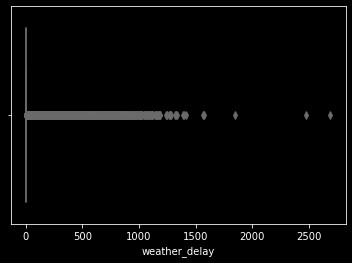

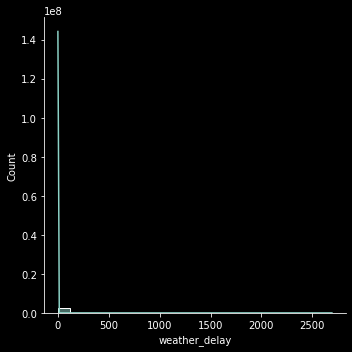

In [74]:
# Box plot
sns.boxplot(x='weather_delay', data=flights)
# Distribution plot
sns.displot(data=flights, x='weather_delay', kde=True)

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

A simple way to define **taxi time** is the amount of time an aircraft spends in movement on the surface of an airport.
Source: [Predicting Aircraft Taxi Time](https://towardsdatascience.com/predicting-aircraft-taxi-time-6c4eaa402d77)

Departure taxi-time (or taxi-out time) is the period of time between an aircraft leaving a terminal gate and actually taking off from an airport.

Vice versa, arrival taxi-time (or taxi-in time) is the period of time between an aircraft touch down and getting to the gate.

In [68]:
flights[['fl_date', 'mkt_unique_carrier', 'crs_dep_time', 'crs_arr_time', 'taxi_in', 'taxi_out']].sort_values(by='fl_date').head()

,fl_date,mkt_unique_carrier,crs_dep_time,crs_arr_time,taxi_in,taxi_out
354744,2018-01-01,DL,2002,2200,4.0,20.0
354412,2018-01-01,AA,1555,1722,4.0,18.0
354413,2018-01-01,AA,1738,1913,15.0,17.0
354414,2018-01-01,AA,1800,1930,4.0,32.0
354415,2018-01-01,UA,1955,2210,3.0,42.0


In [69]:
from matplotlib import pyplot as plt

In [70]:
#fig, (ax1, ax2) = plt.subplots(1,2)
#a = flights.taxi_in
#ax.hist(a)
#ax.set_title("histogram of result")
#ax.set_xlabel('taxi in')
#x.set_ylabel('count')

#fig,ax = plt.subplots(1,1)
#a = flights.taxi_out
#ax.hist(a)
#ax.set_title("histogram of result")
#ax.set_xlabel('taxi in')
#ax.set_ylabel('count')

Text(0, 0.5, 'count')

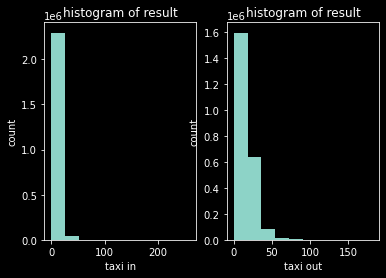

In [71]:
fig, (ax1, ax2) = plt.subplots(1,2)
a1 = flights.taxi_in
a2 = flights.taxi_out
ax1.hist(a1)
ax2.hist(a2)
ax1.set_title("histogram of result")
ax1.set_xlabel('taxi in')
ax1.set_ylabel('count')
ax2.set_title("histogram of result")
ax2.set_xlabel('taxi out')
ax2.set_ylabel('count')

In [72]:
flights[['crs_dep_time', 'crs_arr_time']][0:10]

,crs_dep_time,crs_arr_time
0,1020,1112
1,1148,1340
2,1155,1551
3,839,959
4,710,826
5,940,1056
6,2130,2217
7,1730,1917
8,1830,2050
9,845,1105


In [133]:
#fig,ax = plt.subplots(1,1)
#a = flights.crs_dep_time
#ax.hist(a)
#ax.set_title("histogram of result")
#ax.set_xlabel('dep time')
#ax.set_ylabel('count')

#fig,ax = plt.subplots(1,1)
#a = flights.crs_arr_time
#ax.hist(a)
#ax.set_title("histogram of result")
#ax.set_xlabel('arr time')
#ax.set_ylabel('count')

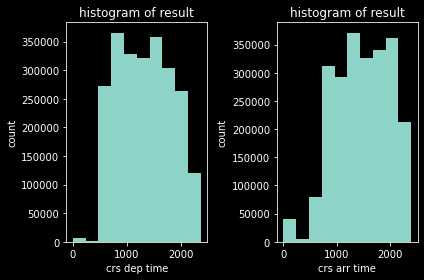

In [73]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(flights.crs_dep_time)
ax2.hist(flights.crs_arr_time)
ax1.set_title("histogram of result")
ax1.set_xlabel('crs dep time')
ax1.set_ylabel('count')
ax2.set_title("histogram of result")
ax2.set_xlabel('crs arr time')
ax2.set_ylabel('count')
fig.tight_layout()

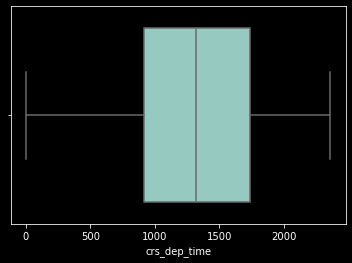

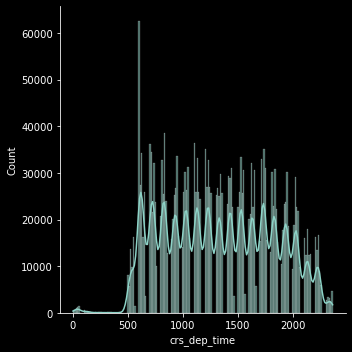

In [74]:
# Box plot
sns.boxplot(x='crs_dep_time', data=flights)
# Distribution plot
sns.displot(data=flights, x='crs_dep_time', kind='hist', kde=True)

**Taxi-Out** vs **CRS Dep Time**

<AxesSubplot:xlabel='crs_dep_time', ylabel='taxi_out'>

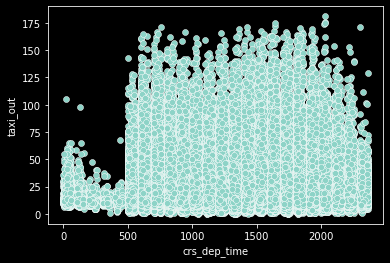

In [77]:
sns.scatterplot(data=flights, x="crs_dep_time", y="taxi_out")

<AxesSubplot:xlabel='dep_time', ylabel='taxi_out'>

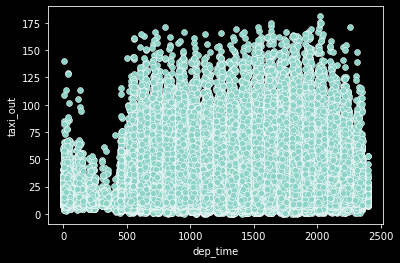

In [94]:
sns.scatterplot(data=flights, x="dep_time", y="taxi_out")

**Taxi-In** vs **CRS Arr Time**

<AxesSubplot:xlabel='crs_arr_time', ylabel='taxi_in'>

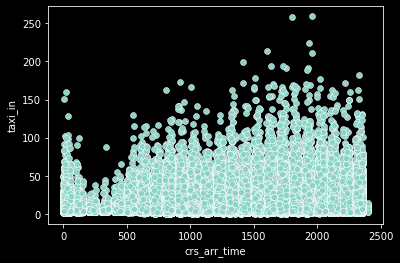

In [78]:
sns.scatterplot(data=flights, x="crs_arr_time", y="taxi_in")

<AxesSubplot:xlabel='arr_time', ylabel='taxi_in'>

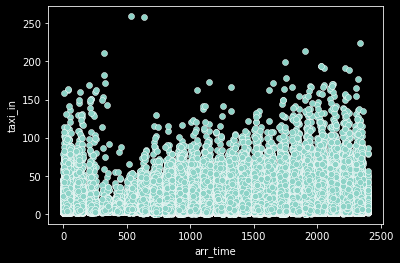

In [95]:
sns.scatterplot(data=flights, x="arr_time", y="taxi_in")

Here we could see that taxi times tend to be low during red eye flights flights (flights that leave in the evening or at night, and arrives at the end destination during the day (normally in the morning).

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [79]:
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-05-19,UA,UA_CODESHARE,UA,4264,EV,N48901,4264,12266,IAH,...,52.0,51.0,26.0,1,127,0.0,0.0,0.0,0.0,0.0
1,2019-05-19,UA,UA_CODESHARE,UA,4266,EV,N12540,4266,13244,MEM,...,112.0,102.0,81.0,1,468,0.0,0.0,0.0,0.0,0.0
2,2019-05-19,UA,UA_CODESHARE,UA,4272,EV,N11164,4272,12266,IAH,...,176.0,184.0,143.0,1,1091,0.0,0.0,0.0,0.0,0.0
3,2019-05-19,UA,UA_CODESHARE,UA,4281,EV,N13995,4281,11042,CLE,...,80.0,68.0,49.0,1,310,0.0,0.0,0.0,0.0,0.0
4,2019-05-19,UA,UA_CODESHARE,UA,4286,EV,N13903,4286,13061,LRD,...,76.0,80.0,57.0,1,301,0.0,0.0,0.0,0.0,0.0


In [80]:
flights[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2387950,89.0,0.0,42.0,0.0,0.0
2387951,0.0,0.0,0.0,0.0,0.0
2387952,0.0,0.0,0.0,0.0,0.0
2387953,0.0,0.0,0.0,0.0,0.0


In [81]:
flights[['crs_dep_time', 'dep_time', 'wheels_off', 'taxi_out', 'dep_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'crs_arr_time', 'wheels_on','arr_time', 'taxi_in', 'arr_delay']].query('arr_delay > 0').head(20)

,crs_dep_time,dep_time,wheels_off,taxi_out,dep_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,crs_arr_time,wheels_on,arr_time,taxi_in,arr_delay
2,1155,1151.0,1224.0,33.0,-4.0,0.0,0.0,0.0,0.0,0.0,1551,1547.0,1555.0,8.0,4.0
7,1730,1729.0,1830.0,61.0,-1.0,0.0,0.0,38.0,0.0,0.0,1917,1945.0,1955.0,10.0,38.0
8,1830,1835.0,1854.0,19.0,5.0,5.0,0.0,11.0,0.0,0.0,2050,2058.0,2106.0,8.0,16.0
10,740,736.0,749.0,13.0,-4.0,0.0,0.0,0.0,0.0,0.0,923,930.0,935.0,5.0,12.0
14,1400,1400.0,1436.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,1724,1731.0,1735.0,4.0,11.0
15,610,849.0,902.0,13.0,159.0,140.0,0.0,0.0,0.0,0.0,704,914.0,924.0,10.0,140.0
17,715,733.0,748.0,15.0,18.0,0.0,0.0,0.0,0.0,0.0,855,855.0,901.0,6.0,6.0
19,2130,2120.0,2134.0,14.0,-10.0,0.0,0.0,0.0,0.0,0.0,2236,2241.0,2248.0,7.0,12.0
23,1940,2104.0,2127.0,23.0,84.0,0.0,0.0,0.0,0.0,82.0,2037,2154.0,2159.0,5.0,82.0
26,1833,1934.0,2011.0,37.0,61.0,0.0,0.0,61.0,0.0,19.0,2151,2306.0,2311.0,5.0,80.0


In [82]:
flights[['crs_dep_time', 'dep_time', 'dep_delay','taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay']].query('arr_delay > 0')

,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay
2,1155,1151.0,-4.0,33.0,1224.0,1547.0,8.0,1551,1555.0,4.0
7,1730,1729.0,-1.0,61.0,1830.0,1945.0,10.0,1917,1955.0,38.0
8,1830,1835.0,5.0,19.0,1854.0,2058.0,8.0,2050,2106.0,16.0
10,740,736.0,-4.0,13.0,749.0,930.0,5.0,923,935.0,12.0
14,1400,1400.0,0.0,36.0,1436.0,1731.0,4.0,1724,1735.0,11.0
...,...,...,...,...,...,...,...,...,...,...
2387944,617,617.0,0.0,19.0,636.0,818.0,7.0,821,825.0,4.0
2387945,1746,1836.0,50.0,36.0,1912.0,2155.0,10.0,2101,2205.0,64.0
2387947,737,738.0,1.0,34.0,812.0,1130.0,15.0,1110,1145.0,35.0
2387950,1156,1325.0,89.0,31.0,1356.0,1745.0,11.0,1545,1756.0,131.0


In [83]:
flights.arr_delay

0           -2.0
1          -14.0
2            4.0
3          -20.0
4           -1.0
           ...  
2387950    131.0
2387951      0.0
2387952    -15.0
2387953     -5.0
2387954     21.0
Name: arr_delay, Length: 2339962, dtype: float64

**Delays created before departure**

In [84]:
((flights[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1) > 0).sum() / flights.shape[0]) * 100

19.252534870224387

In [85]:
flights.shape[0]

2339962

#### **Task 6**: How many states cover 50% of US air traffic? 

In [86]:
flights[['origin_airport_id', 'origin_city_name']]

,origin_airport_id,origin_city_name
0,12266,"Houston, TX"
1,13244,"Memphis, TN"
2,12266,"Houston, TX"
3,11042,"Cleveland, OH"
4,13061,"Laredo, TX"
...,...,...
2387950,11298,"Dallas/Fort Worth, TX"
2387951,13577,"Myrtle Beach, SC"
2387952,10792,"Buffalo, NY"
2387953,12266,"Houston, TX"


In [88]:
city_state = flights["origin_city_name"].apply(lambda x: x.split(", "))
city = city_state.apply(lambda x: (x[0]))
state = city_state.apply(lambda x: x[1])
result = pd.DataFrame(zip(city, state), columns=["city", "state"])

In [89]:
city_state

0                    [Houston, TX]
1                    [Memphis, TN]
2                    [Houston, TX]
3                  [Cleveland, OH]
4                     [Laredo, TX]
                    ...           
2387950    [Dallas/Fort Worth, TX]
2387951         [Myrtle Beach, SC]
2387952              [Buffalo, NY]
2387953              [Houston, TX]
2387954             [Columbia, SC]
Name: origin_city_name, Length: 2339962, dtype: object

In [90]:
result

,city,state
0,Houston,TX
1,Memphis,TN
2,Houston,TX
3,Cleveland,OH
4,Laredo,TX
...,...,...
2339957,Dallas/Fort Worth,TX
2339958,Myrtle Beach,SC
2339959,Buffalo,NY
2339960,Houston,TX


In [91]:
flights2 = flights.copy()

In [92]:
flights2[['origin_city_name', 'origin', 'origin_airport_id', 'dest_city_name', 'dest', 'dest_airport_id']]

,origin_city_name,origin,origin_airport_id,dest_city_name,dest,dest_airport_id
0,"Houston, TX",IAH,12266,"Lake Charles, LA",LCH,12915
1,"Memphis, TN",MEM,13244,"Houston, TX",IAH,12266
2,"Houston, TX",IAH,12266,"Cleveland, OH",CLE,11042
3,"Cleveland, OH",CLE,11042,"Washington, DC",DCA,11278
4,"Laredo, TX",LRD,13061,"Houston, TX",IAH,12266
...,...,...,...,...,...,...
2387950,"Dallas/Fort Worth, TX",DFW,11298,"Miami, FL",MIA,13303
2387951,"Myrtle Beach, SC",MYR,13577,"Philadelphia, PA",PHL,14100
2387952,"Buffalo, NY",BUF,10792,"Philadelphia, PA",PHL,14100
2387953,"Houston, TX",IAH,12266,"Jackson/Vicksburg, MS",JAN,12448


In [93]:
flights2['dep_city'] = flights2["origin_city_name"].apply(lambda x: x.split(", ")[0])
flights2['dep_state'] = flights2["origin_city_name"].apply(lambda x: x.split(", ")[1])
flights2['arr_city'] = flights2["dest_city_name"].apply(lambda x: x.split(", ")[0])
flights2['arr_state'] = flights2["dest_city_name"].apply(lambda x: x.split(", ")[1])

In [178]:
states_traffic = flights2[['fl_date', 'origin_city_name', 'dep_state', 'origin', 'origin_airport_id', 'dest_city_name', 'arr_state', 'dest', 'dest_airport_id']]

In [179]:
states_traffic.head()

,fl_date,origin_city_name,dep_state,origin,origin_airport_id,dest_city_name,arr_state,dest,dest_airport_id
0,2019-05-19,"Houston, TX",TX,IAH,12266,"Lake Charles, LA",LA,LCH,12915
1,2019-05-19,"Memphis, TN",TN,MEM,13244,"Houston, TX",TX,IAH,12266
2,2019-05-19,"Houston, TX",TX,IAH,12266,"Cleveland, OH",OH,CLE,11042
3,2019-05-19,"Cleveland, OH",OH,CLE,11042,"Washington, DC",DC,DCA,11278
4,2019-05-19,"Laredo, TX",TX,LRD,13061,"Houston, TX",TX,IAH,12266


In [180]:
dep_states_traffic = flights2[['dep_state']]
arr_states_traffic = flights2[['arr_state']]

In [184]:
#dep_states_traffic.value_counts().cumsum()/dep_states_traffic.sum()

In [ ]:
dep_states_traffic.cumsum()<=50)

In [ ]:
dep_states_traffic['percentage'] = .cumsum()<=50)

In [182]:
arr_states_traffic.value_counts()

arr_state
CA           257081
TX           230677
FL           170216
IL           146086
GA           124632
NY           119829
NC           107780
CO            91444
DC            69250
PA            69115
WA            68448
MI            65786
AZ            61358
NV            56133
OH            53524
MN            51173
NJ            48129
MA            45461
MO            43290
TN            40919
UT            37416
HI            35099
OR            33739
MD            31641
LA            25112
VA            22463
IN            21496
WI            20600
SC            20393
OK            13447
AL            12838
AK            12087
KY            11983
NE             9871
ID             9810
AR             9769
NM             9402
CT             9074
IA             9017
MT             8997
PR             8606
ND             6318
ME             6100
RI             5936
KS             4971
MS             4621
SD             4601
VT             3479
NH             3387
WY        

In [166]:
#states_traffic.groupby('arr_state').count()

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [102]:
flights.groupby('mkt_unique_carrier').value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [93]:
fuel_consumption.columns

Index(['month', 'airline_id', 'unique_carrier', 'carrier', 'carrier_name',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost', 'year'],
      dtype='object')

In [100]:
fuel_consumption[['month', 'airline_id', 'unique_carrier', 'sdomt_gallons', 'satl_gallons', 'spac_gallons', 'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons', 'tint_gallons', 'total_gallons', 'total_cost', 'year']].head(20)

,month,airline_id,unique_carrier,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,total_cost,year
1,1,21352.0,0WQ,0.0,0.0,0.0,0.0,0.0,0.0,163052.0,47060.0,210112.0,536455,2016
2,1,21645.0,23Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2016
3,1,21652.0,27Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2016
4,1,20408.0,5V,260848.0,0.0,0.0,0.0,0.0,260848.0,284362.0,0.0,284362.0,569497,2016
5,1,19917.0,5X,32138000.0,9743000.0,16116000.0,2972000.0,28831000.0,60969000.0,32138000.0,28831000.0,60969000.0,65339000,2016
6,1,20007.0,5Y,0.0,0.0,0.0,0.0,0.0,0.0,4850893.0,19958297.0,24809190.0,44370847,2016
7,1,19874.0,8C,0.0,0.0,0.0,0.0,0.0,0.0,24211.0,725041.0,749252.0,1897501,2016
8,1,20363.0,9E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2016
9,1,20190.0,9S,821638.0,4696010.0,580875.0,0.0,5276885.0,6098523.0,821638.0,5276885.0,6098523.0,12806900,2016
10,1,19805.0,AA,174110023.0,34804210.0,18848029.0,54176666.0,107828905.0,281938928.0,174766325.0,107982308.0,282748633.0,317344085,2016


Excluding the columns with object dtypes and the `airline_id` feature, calculate for the median values for each column.

In [87]:
fuel_consumption[fuel_consumption_missing_value_percentage[fuel_consumption_missing_values].index].select_dtypes(include=np.number).iloc[:,1:].median()

sdomt_gallons         0.0
satl_gallons          0.0
spac_gallons          0.0
slat_gallons          0.0
sint_gallons          0.0
ts_gallons            0.0
tdomt_gallons    329063.0
tint_gallons     143458.0
total_gallons    563741.0
satl_cost             0.0
spac_cost             0.0
slat_cost             0.0
sint_cost             0.0
tint_cost        302664.0
dtype: float64

In [188]:
fuel_consumption['sdomt_gallons'].describe()

count    3.034000e+03
mean     1.786446e+07
std      4.340146e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.256753e+06
max      2.062579e+08
Name: sdomt_gallons, dtype: float64

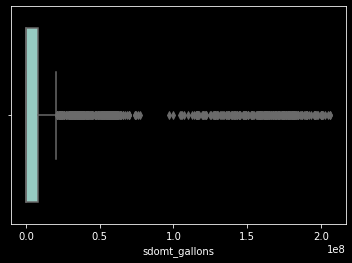

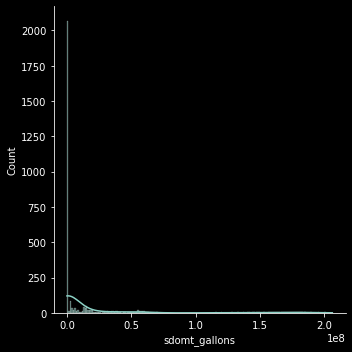

In [187]:
# Box plot
sns.boxplot(x='sdomt_gallons', data=fuel_consumption)
# Distribution plot
sns.displot(data=fuel_consumption, x='sdomt_gallons', kde=True)

In [186]:
fuel_consumption['satl_gallons'].describe()

count    3.034000e+03
mean     3.850826e+06
std      1.404681e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.813328e+07
Name: satl_gallons, dtype: float64

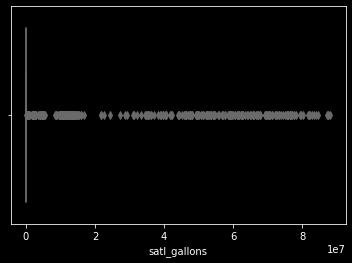

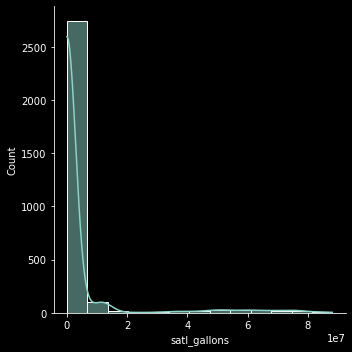

In [185]:
# Box plot
sns.boxplot(x='satl_gallons', data=fuel_consumption)
# Distribution plot
sns.displot(data=fuel_consumption, x='satl_gallons', kde=True)


In [183]:
fuel_consumption['spac_gallons'].describe()

count    3.034000e+03
mean     3.147425e+06
std      9.696375e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.928570e+07
Name: spac_gallons, dtype: float64

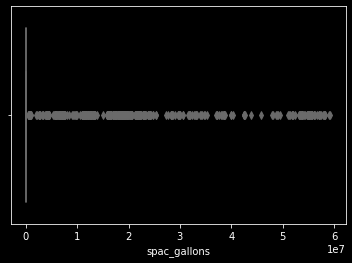

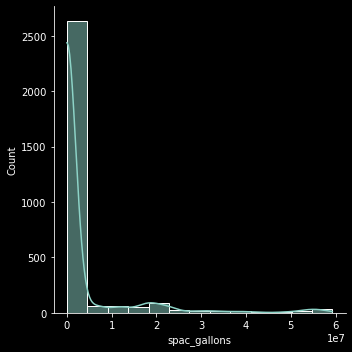

In [184]:
# Box plot
sns.boxplot(x='spac_gallons', data=fuel_consumption)
# Distribution plot
sns.displot(data=fuel_consumption, x='spac_gallons', kde=True)


In [190]:
fuel_consumption['slat_gallons'].describe()

count    3.033000e+03
mean     2.385017e+06
std      8.090002e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.501094e+07
Name: slat_gallons, dtype: float64

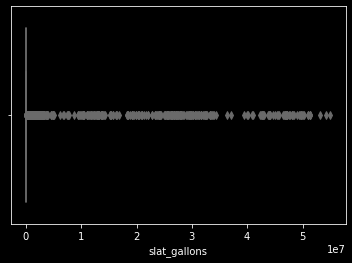

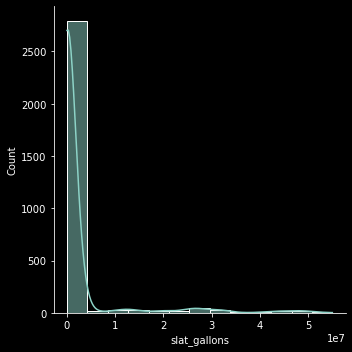

In [191]:
# Box plot
sns.boxplot(x='slat_gallons', data=fuel_consumption)
# Distribution plot
sns.displot(data=fuel_consumption, x='slat_gallons', kde=True)

In [193]:
fuel_consumption['sint_gallons'].describe()

count    3.034000e+03
mean     9.382481e+06
std      3.016724e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.056932e+06
max      1.689833e+08
Name: sint_gallons, dtype: float64

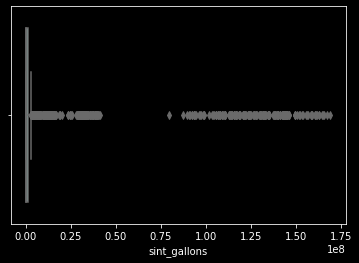

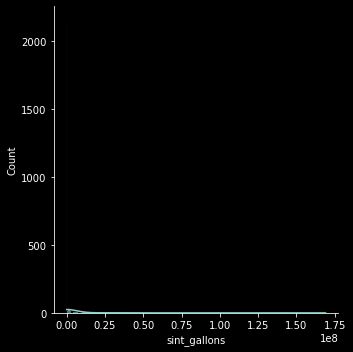

In [192]:
# Box plot
sns.boxplot(x='sint_gallons', data=fuel_consumption)
# Distribution plot
sns.displot(data=fuel_consumption, x='sint_gallons', kde=True)

In [195]:
fuel_consumption['ts_gallons'].describe()

count    3.034000e+03
mean     2.724694e+07
std      7.006669e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.350685e+07
max      3.499851e+08
Name: ts_gallons, dtype: float64

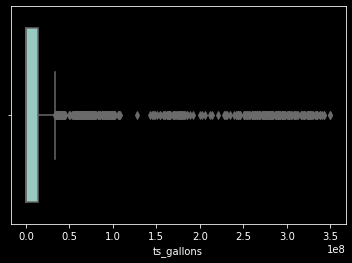

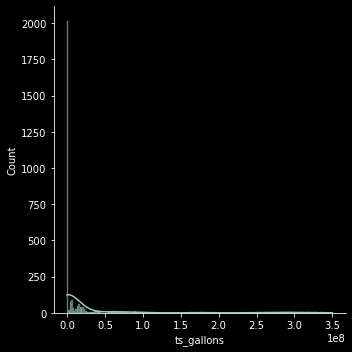

In [194]:
# Box plot
sns.boxplot(x='ts_gallons', data=fuel_consumption)
# Distribution plot
sns.displot(data=fuel_consumption, x='ts_gallons', kde=True)

Since the `tdomt_gallons`, `tint_gallons`, `total_gallons` and `tint_cost` columns have relatively large values, we take them out for now. For the remaining columns, we replace the missing values with the median value.

In [103]:
fuel_consumption[['sdomt_gallons', 'satl_gallons', 'spac_gallons', 'slat_gallons', 'sint_gallons', 'ts_gallons', 'satl_cost', 'spac_cost', 'slat_cost', 'sint_cost']]

,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,satl_cost,spac_cost,slat_cost,sint_cost
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,260848.0,0.0,0.0,0.0,0.0,260848.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3033,21048.0,0.0,0.0,0.0,0.0,21048.0,0.0,0.0,0.0,0.0


In [90]:
fuel_consumption.tdomt_gallons.mean()

18270544.798812665

In [91]:
fuel_consumption.tdomt_gallons.median()

329063.0

In [92]:
fuel_consumption.tdomt_gallons.mode()

0    0.0
dtype: float64

In [96]:
fuel_consumption.sint_gallons.median()

0.0

In [56]:
fuel_consumption[fuel_consumption.total_gallons.isna()].total_gallons

2018   NaN
2616   NaN
2873   NaN
2924   NaN
2975   NaN
3025   NaN
Name: total_gallons, dtype: float64

In [172]:
fuel_consumption[fuel_consumption.tdomt_gallons.isna()].tdomt_gallons

2438   NaN
2487   NaN
2616   NaN
Name: tdomt_gallons, dtype: float64

In [175]:
fuel_consumption['tdomt_gallons'][50:71]

50       427170.0
51       290899.0
52            0.0
53     12732476.0
54      6016332.0
55    153259159.0
56       218800.0
57       128194.0
58            0.0
59            0.0
60            0.0
61       287095.0
62     31170000.0
63      4697494.0
64        18695.0
65            0.0
66       749638.0
67    167962196.0
68       252917.0
69     34637580.0
70     47006545.0
Name: tdomt_gallons, dtype: float64

In [54]:
fuel_consumption.iloc[:,7:15].isna().sum()

satl_gallons     1
spac_gallons     1
slat_gallons     2
sint_gallons     1
ts_gallons       1
tdomt_gallons    3
tint_gallons     1
total_gallons    6
dtype: int64

In [108]:
fuel_consumption[fuel_consumption.tdomt_gallons.isna()].tdomt_gallons

2438   NaN
2487   NaN
2616   NaN
Name: tdomt_gallons, dtype: float64

In [113]:
fuel_consumption['tdomt_gallons'].median()

329063.0

In [114]:
fuel_consumption[fuel_consumption.tint_gallons.isna()].tint_gallons

2616   NaN
Name: tint_gallons, dtype: float64

In [117]:
fuel_consumption['tint_gallons'].median()

143458.0

In [118]:
fuel_consumption[fuel_consumption.total_gallons.isna()].total_gallons

2018   NaN
2616   NaN
2873   NaN
2924   NaN
2975   NaN
3025   NaN
Name: total_gallons, dtype: float64

In [119]:
fuel_consumption['total_gallons'].median()

563741.0

In [120]:
fuel_consumption[fuel_consumption.tint_cost.isna()].tint_cost

2616   NaN
Name: tint_cost, dtype: float64

In [121]:
fuel_consumption['tint_cost'].median()

302664.0

In [2]:
passengers = pd.read_csv('../Data/files/passengers.csv')

In [3]:
passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,month,year,distance_group,class,data_source
0,2,2,75800,300,244,0,0,1020,310,259,...,US,United States,6,694,1,2017,3,3,F,DU
1,2,2,72400,256,219,458,950,255,140,90,...,US,United States,6,698,1,2017,3,1,F,DU
2,2,2,76000,300,240,75,335,601,208,174,...,US,United States,6,694,1,2017,3,2,F,DU
3,2,2,104600,376,187,0,58,304,156,103,...,US,United States,6,622,1,2017,3,1,F,DU
4,2,2,72700,256,214,3,553,507,196,156,...,US,United States,6,698,1,2017,3,2,F,DU
